In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [47]:
def plot_sample(index):
  plt.figure(figsize=(2,2))
  plt.imshow(xtrain[index])
  for i in ytrain[index]:
    break
  plt.title(classes[i])

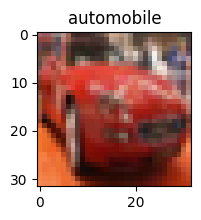

In [48]:
plot_sample(5)

In [49]:
xtrain = xtrain/255
xtest = xtest/255

In [63]:
model = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 63s 40ms/step - loss: 2.0444 - accuracy: 0.2581
Epoch 2/20
1563/1563 [==============================] - 63s 41ms/step - loss: 1.6426 - accuracy: 0.4151
Epoch 3/20
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4447 - accuracy: 0.4857
Epoch 4/20
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3326 - accuracy: 0.5292
Epoch 5/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2438 - accuracy: 0.5625
Epoch 6/20
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1740 - accuracy: 0.5897
Epoch 7/20
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1090 - accuracy: 0.6106
Epoch 8/20
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0527 - accuracy: 0.6323
Epoch 9/20
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0073 - accuracy: 0.6501
Epoch 10/20
1563/1563 [==============================] - 63s 40m

In [65]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 4s 11ms/step - loss: 0.9340 - accuracy: 0.6825


[0.934029221534729, 0.6825000047683716]

In [68]:
ypred = model.predict(xtest)

313/313 [==============================] - 4s 12ms/step


In [74]:
y_classes = [np.argmax(i) for i in ypred]
y_classes[0:5]

[3, 1, 8, 0, 4]

In [76]:
ytest[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)